# Supervised v Unsupervised Tasks in Machine Learning

In the broad field of machine learning, there are two main categories to which most problems belong (there is a third type: semi supervised machine learning and you could even get more in depth and find that there's more than those three: https://machinelearningmastery.com/types-of-learning-in-machine-learning/). As you could have guessed these two categories are:

1. **Supervised** Learning
2. **Unsupervised** Learning

The main difference between the two types of learning is **labeled** data - where Supervised Learning has labeled data and Unsupervised Learning does not. By labeled data I mean that we know what variables are inputs and what variables are outputs. Consequently, we'll try and find relationships between these inputs and outputs. This is by far the most prominent type of machine learning category and I've created a [notebook](regression-classification.ipynb) similar to this which describes two subsets of this category.

In Unsupervised Learning, we have data which is not labeled and as a result, the tasks associated with this learning are more exploratory than predictive. Some of the most common tasks within Unsupervised learning are **clustering** and **dimensionality reduction**.

Since I've already fleshed out [Supervised Learning](regression-classification.ipynb), I'll use this notebook for creating examples for Unsupervised Learning. I encourage you to go and check out the other notebook if you haven't already. 

Anywways, Let's get to it 🕺🏽!

## Necessary Imports / Helper Functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_style('whitegrid')
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
def create_cluster_data(n_samples: int, n_clusters, deviation: float):
    """Uses the sklearn make_blobs to create different clustering groups."""
    X, _ = make_blobs(n_samples=n_samples, 
                      n_features=2, 
                      centers=n_clusters, 
                      cluster_std=deviation, 
                      center_box=(0,1), # used 0-1 to treat data as normalized 
                      random_state=70)

    df = pd.DataFrame(data=X, columns=['Avg Error', 'Age'])
    
    return df


def create_kmeans_clusters(X, n_clusters):
    """Fits k-mean cluster"""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    
    return kmeans


def plot_cluster(X, kmeans, labels=None ,point=None):
    """Plots the k-means cluster with the appropriate number of gropus and labels."""
    sns.scatterplot(x=X.iloc[:,1], y=X.iloc[: ,0], hue=kmeans.labels_, palette='Set1')
    
    if labels:
        for i, x in enumerate(kmeans.cluster_centers_):
            plt.text(x[1], x[0] + 0.15 , labels[i], horizontalalignment='center', size='medium', color='black', weight='semibold')
    if point is not None:
        plt.scatter(point[0], point[1])
        plt.text(point[0] + 0.05, point[1] + 0.05, 'New Point', horizontalalignment='center', size='medium', color='black', weight='semibold')
   
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=70, color='black')  # plotting the cluster centers
    plt.title(f'KMeans with {kmeans.cluster_centers_.shape[0]} Clusters', fontsize=15)
    plt.xlabel('Age (Years)', fontsize=12)
    plt.ylabel('Avg Error', fontsize=12)
    plt.show()

def plot_elbow(data, num_clusters):
    """Generates an elbow plot that is used to determine the optimal amount of cluster."""
    
    cluster_range = range(1, num_clusters)
    sum_squared_distance = []  
    kmeans = []  # Storing Kmeans algo's for final example

    for cluster_size in cluster_range:
        kmeans_cluster = create_kmeans_clusters(data, cluster_size)
        sum_squared_distance.append(kmeans_cluster.inertia_)
        kmeans.append(kmeans_cluster)
        
    sns.lineplot(x=cluster_range, y=sum_squared_distance, marker='o', color='orange' )
    plt.xlabel('Number of Clusters', fontsize=12) 
    plt.ylabel('Inertia (Sum of Squared Distance)', fontsize=12) 
    plt.show()
    
    return kmeans


## Unsupervised Learning Example

Unsupervised learning is a technique which while perhaps not too common, is quite useful in production, where often times our production data is unlabeled. For our example, let's say you're tasked with looking at all of the analyzers and classifying them into groups to implement an effective maintenance plan.

You're given the standard deviation of the measurements for 300 sensors and the age of each of the analyzers. With these two pieces of information, we explore our data to see if there are any common groups that we can make out.

In [3]:
# Creating the data and viewing the first five rows:
sensor_df = create_cluster_data(300, 4, 0.05)
sensor_df.head()

,Avg Error,Age
0,0.332879,0.148118
1,0.911217,0.445548
2,0.526906,0.811030
3,0.917770,0.875535
4,0.966123,0.925544


Often times, the best place to begin is with a simple scatterplot to see if there are any obvious groups that we can make out from the data - so let's do that now:

Text(0, 0.5, 'Avg Error')

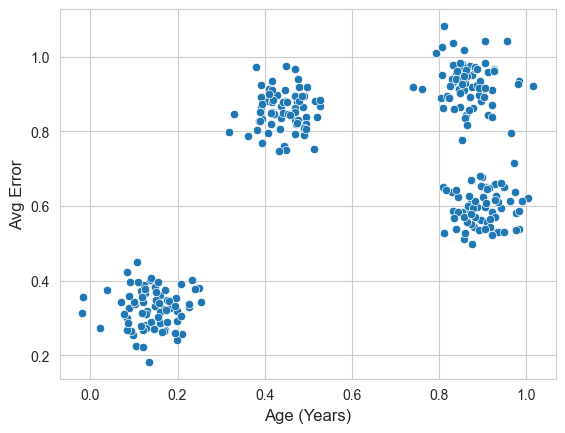

In [4]:
sns.scatterplot(x='Age', y='Avg Error', data=sensor_df)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Avg Error', fontsize=12)

Already, we can begin to make out some of the groups that are available to us, in fact, it's quite easy to identify the four clusters.

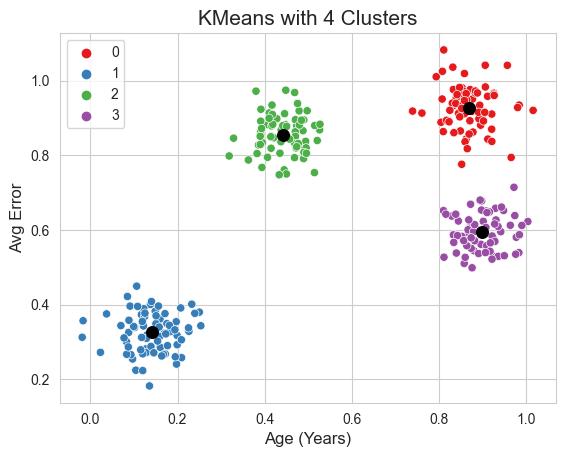

In [5]:
# Creating the clustering algorithm and viewing a graphical output
kmeans_cluster = create_kmeans_clusters(sensor_df, 4)
plot_cluster(sensor_df, kmeans_cluster)

Having these clusters, we can go ahead and label them as we see fit. For example, appropriate labels here may be the following:

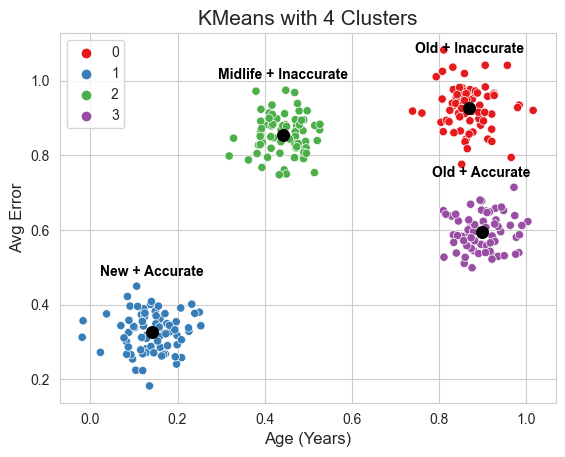

In [6]:
labels = ['Old + Inaccurate', 'New + Accurate', 'Midlife + Inaccurate', 'Old + Accurate']
plot_cluster(sensor_df, kmeans_cluster, labels)

From this clustering algorithm we can then go ahead and do two things:

1. Create different maintenance plans for treating the different sorts of sensors that we find according to their categorization (i.e. for the Old & Inaccurate sensors perhaps it's a replacement)
2. Use this clustering algorithm for new sensors that were not captured previously to predict what sort of maintenance plan should be applied to them

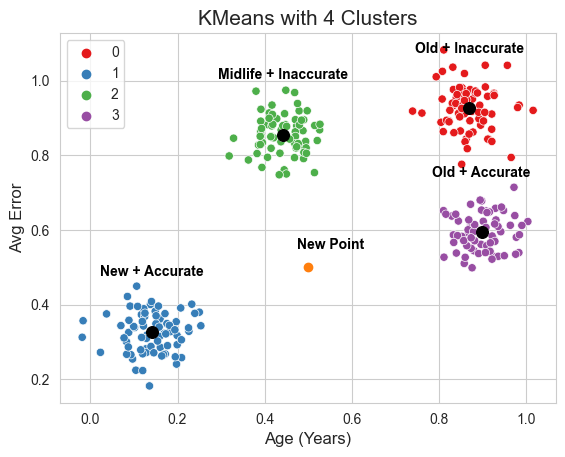

In [7]:
# Regarding the second point, let's say we have a point like the following:
new_point = np.array([0.5, 0.5])
plot_cluster(sensor_df, kmeans_cluster, labels, new_point)

With this new point, it may not be immediately obvious where we should catergorize it, so we can use the algorithm to give us it's best prediction!

In [8]:
kmeans_cluster.predict(new_point.reshape(1, 2))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

What we find is that our algorithm predicts that we should apply an "Old + Accurate" maintenance plan to this new sensor!

### Continued Example

However, what do we do when our clusters are actually quite close together? It may be difficult to visually identify each of the clusters, such as in the following example:

Text(0, 0.5, 'Avg Error')

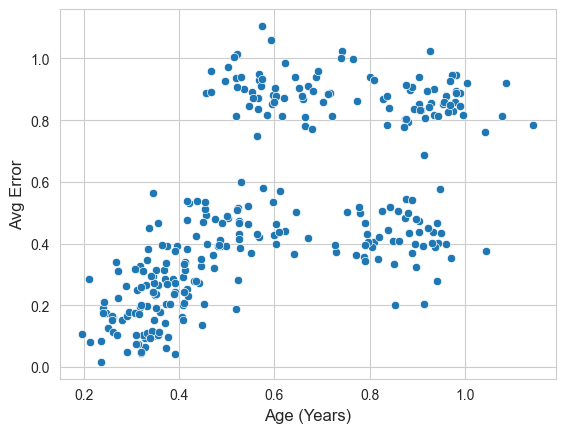

In [9]:
sensor_df = create_cluster_data(300, 6, 0.07)
sns.scatterplot(x='Avg Error', y='Age', data=sensor_df)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Avg Error', fontsize=12)

Fear not! While we don't know how they should be classified (remember this is a key difference in Unsupervised learning), we can try out different combinations of clusters and quantify which one is best by looking at the inertia (sum of squared distance from the cluster center) and plotting it on a graph. 

By looking at the graph, we select the number of clusters at which we see the inertia change from an incline to a flatter line. Since this point resembles an elbow, this is often referred to as the **Elbow Method** 💪🏽

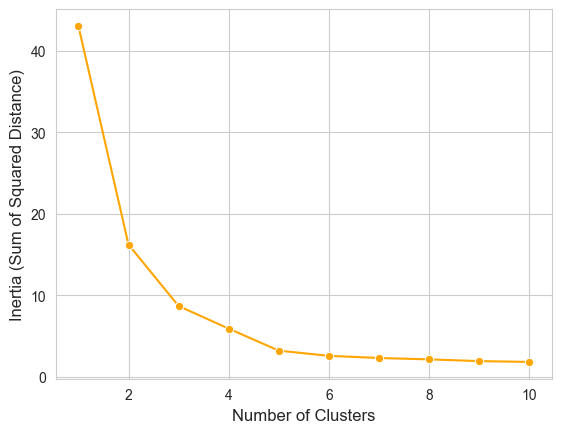

In [10]:
kmeans = plot_elbow(sensor_df, 11)

With that in mind, we can see that optimal number of clusters is most likely **5**. We can visualize that number of clusters to see what the results look like!

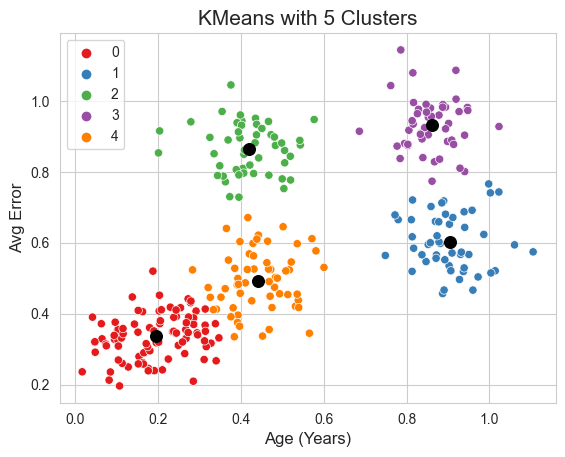

In [11]:
plot_cluster(sensor_df, kmeans[4])

For fun, we can also plot all the other different clusters to see what they look like!

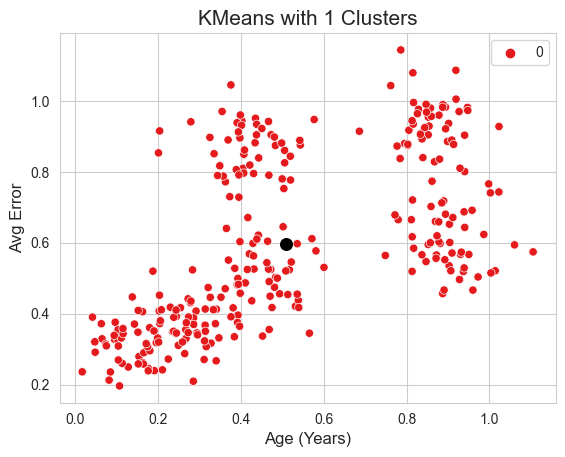

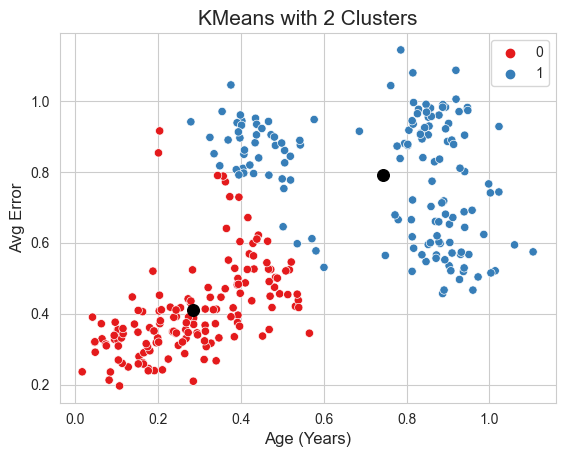

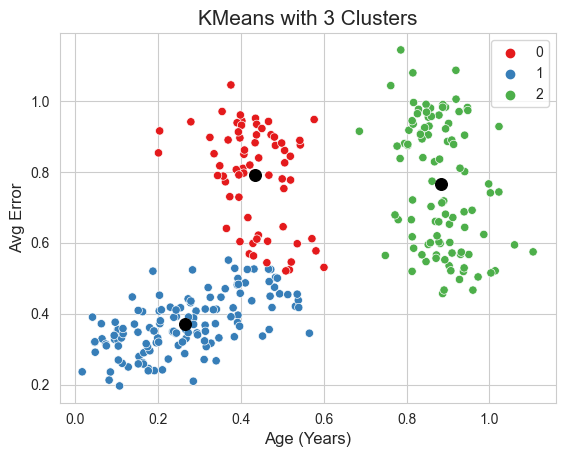

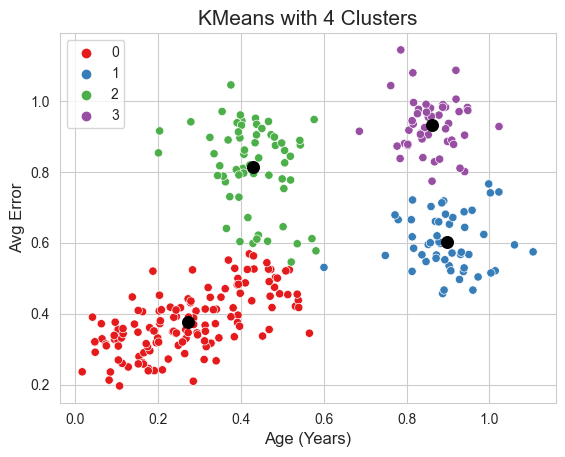

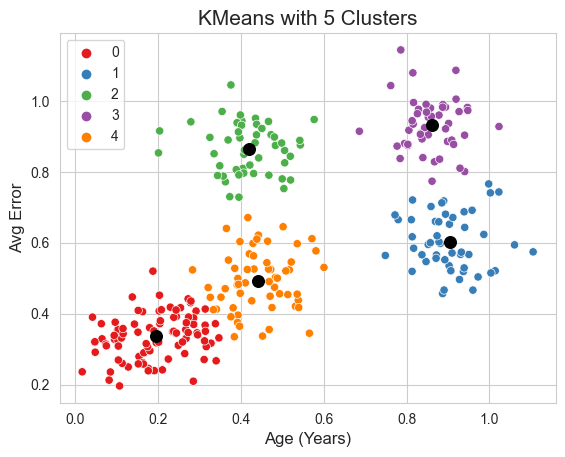

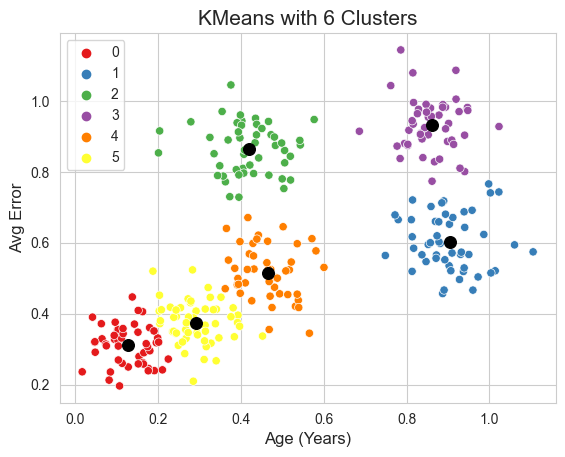

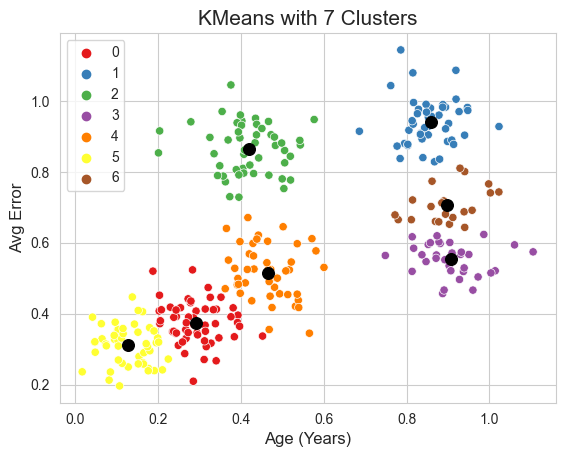

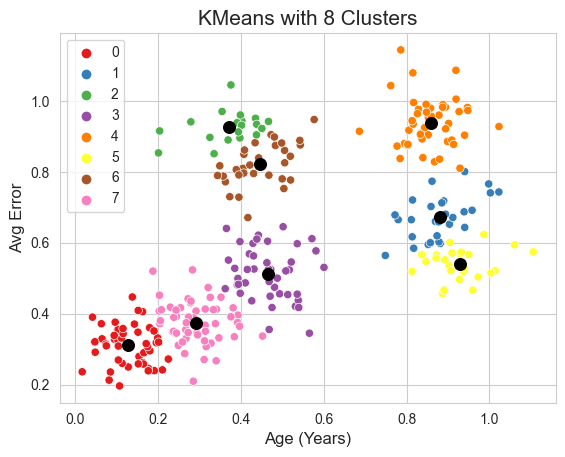

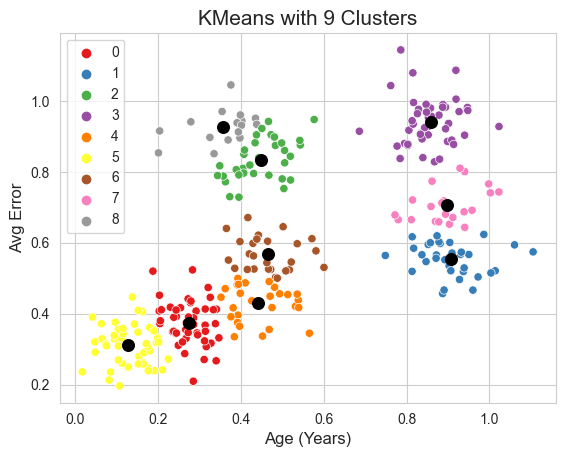

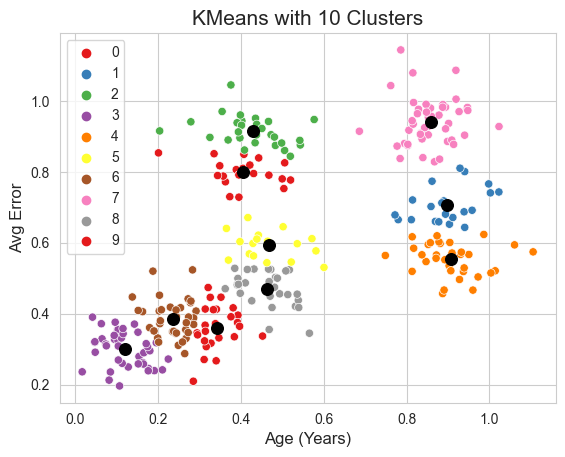

In [12]:
for clusters in kmeans:
    plot_cluster(sensor_df, clusters)

# Conclusion

That's it for this notebook! We can get more in-depth with Unsupervised techniques, but I feel that kmeans-clustering is a nice introduction to the topic.